## Introduction
For this project we will analyze IMDB Movies dataset from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set(color_codes=True)
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

import ast,json

### ▣ Obtaining Data 

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

### ▣ Data Wrangling 

In [5]:
#Removing unnecessary colomns
movies.drop(['homepage','id','keywords','original_language','original_title','overview',
             'production_companies','status','tagline',], axis=1, inplace=True)

#Removing duplicate rows
movies.drop_duplicates(keep='first',inplace=True)

#Removing budget and revenue when it is 0 becasue it is equivalent of NA
movies.drop(movies[(movies['budget'] == 0) | (movies['revenue'] == 0)].index, inplace=True)

movies.shape

(3229, 11)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 11 columns):
budget                  3229 non-null int64
genres                  3229 non-null object
popularity              3229 non-null float64
production_countries    3229 non-null object
release_date            3229 non-null object
revenue                 3229 non-null int64
runtime                 3229 non-null float64
spoken_languages        3229 non-null object
title                   3229 non-null object
vote_average            3229 non-null float64
vote_count              3229 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 302.7+ KB


In [7]:
#release_date should of a datetime data type
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [8]:
#Convert JSON columns
movies['genres'] = movies['genres'].apply(lambda data: [row['name'] for row in json.loads(data)])
movies['production_countries'] = movies['production_countries'].apply(lambda data: [row['name'] for row in json.loads(data)])  
movies['spoken_languages'] = movies['spoken_languages'].apply(lambda data: [row['name'] for row in json.loads(data)])  

In [9]:
movies.head()

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",139.082615,[United States of America],2007-05-19,961000000,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",107.376788,"[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,[United States of America],2012-07-16,1084939099,165.0,[English],The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,[United States of America],2012-03-07,284139100,132.0,[English],John Carter,6.1,2124


### ▣ Findings from the dataset

##### Which are the 3 most expensive movies?

In [10]:
movies.sort_values('budget',ascending=False).head(3)

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
17,380000000,"[Adventure, Action, Fantasy]",135.413856,[United States of America],2011-05-14,1045713802,136.0,"[English, Español]",Pirates of the Caribbean: On Stranger Tides,6.4,4948
1,300000000,"[Adventure, Fantasy, Action]",139.082615,[United States of America],2007-05-19,961000000,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500
7,280000000,"[Action, Adventure, Science Fiction]",134.279229,[United States of America],2015-04-22,1405403694,141.0,[English],Avengers: Age of Ultron,7.3,6767


###### What are top 4 movies to make the most profit? 

In [11]:
movies['profit'] = movies['revenue'] - movies['budget']
movies[['title','profit','budget','revenue','popularity','release_date','runtime',
        'vote_average','vote_count']].sort_values('profit', ascending=False).head(4)

,title,profit,budget,revenue,popularity,release_date,runtime,vote_average,vote_count
0,Avatar,2550965087,237000000,2787965087,150.437577,2009-12-10,162.0,7.2,11800
25,Titanic,1645034188,200000000,1845034188,100.025899,1997-11-18,194.0,7.5,7562
28,Jurassic World,1363528810,150000000,1513528810,418.708552,2015-06-09,124.0,6.5,8662
44,Furious 7,1316249360,190000000,1506249360,102.322217,2015-04-01,137.0,7.3,4176


###### What movies had the least budget?

In [12]:
movies[['title','budget','profit','revenue','popularity','release_date','runtime',
        'vote_average','vote_count']].sort_values(['budget','profit']).head(3)

,title,budget,profit,revenue,popularity,release_date,runtime,vote_average,vote_count
4238,Modern Times,1,8499999,8500000,28.276480,1936-02-05,87.0,8.1,856
3611,A Farewell to Arms,4,21,25,1.199451,1932-12-08,89.0,6.2,28
3372,Split Second,7,-2,5,4.857028,1992-05-01,90.0,5.7,63


###### What movies were high in popularity?

In [13]:
movies[['title','popularity','vote_count','vote_average','profit','budget','revenue','release_date',
        'runtime']].sort_values(by=['popularity','vote_count','vote_average'], ascending=False).head()

,title,popularity,vote_count,vote_average,profit,budget,revenue,release_date,runtime
546,Minions,875.581305,4571,6.4,1082730962,74000000,1156730962,2015-06-17,91.0
95,Interstellar,724.247784,10867,8.1,510120017,165000000,675120017,2014-11-05,169.0
788,Deadpool,514.569956,10995,7.4,725112979,58000000,783112979,2016-02-09,108.0
94,Guardians of the Galaxy,481.098624,9742,7.9,603328629,170000000,773328629,2014-07-30,121.0
127,Mad Max: Fury Road,434.278564,9427,7.2,228858340,150000000,378858340,2015-05-13,120.0


###### Visualize Runtime of movies

Text(0, 0.5, 'Movies')

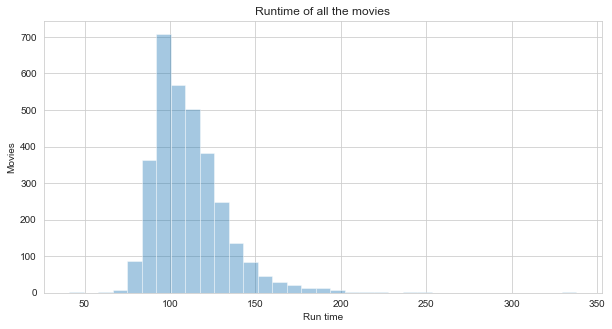

In [14]:
plt.figure(figsize=(10,5))
plt.title('Runtime of all the movies')
runtimePlot = sns.distplot(movies['runtime'],kde=False,bins=35)
runtimePlot.set_xlabel('Run time')
runtimePlot.set_ylabel('Movies')

##### What is an Average runtime of movies?

In [15]:
movies['runtime'].mean()

110.72437287085785

##### What is the longest runtime of movies?

In [16]:
movies[['title','runtime','release_date','popularity','vote_count','vote_average',
        'profit','budget','revenue']].loc[movies['runtime'].max()]

title                     The Alamo
runtime                         137
release_date    2004-04-07 00:00:00
popularity                  10.6604
vote_count                      106
vote_average                    5.8
profit                   -119180039
budget                    145000000
revenue                    25819961
Name: 338, dtype: object

##### What is the Shortest runtime of movies?

In [17]:
movies[['title','runtime','release_date','popularity','vote_count','vote_average',
        'profit','budget','revenue']].loc[movies['runtime'].min()]

title                 Green Lantern
runtime                         114
release_date    2011-06-16 00:00:00
popularity                  51.8728
vote_count                     2487
vote_average                    5.1
profit                     19851172
budget                    200000000
revenue                   219851172
Name: 41, dtype: object

##### What movies are rated high(8 and above)?

In [18]:
movies[movies['vote_average'] >= 8]

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,profit
65,185000000,"[Drama, Action, Crime, Thriller]",187.322927,"[United Kingdom, United States of America]",2008-07-16,1004558444,152.0,"[English, 普通话]",The Dark Knight,8.2,12002,819558444
77,175000000,"[Drama, Comedy, Animation, Family]",128.655964,[United States of America],2015-06-09,857611174,94.0,[English],Inside Out,8.0,6560,682611174
95,165000000,"[Adventure, Drama, Science Fiction]",724.247784,"[Canada, United States of America, United King...",2014-11-05,675120017,169.0,[English],Interstellar,8.1,10867,510120017
96,160000000,"[Action, Thriller, Science Fiction, Mystery, A...",167.583710,"[United Kingdom, United States of America]",2010-07-14,825532764,148.0,"[English, 日本語, Français]",Inception,8.1,13752,665532764
262,93000000,"[Adventure, Fantasy, Action]",138.049577,"[New Zealand, United States of America]",2001-12-18,871368364,178.0,[English],The Lord of the Rings: The Fellowship of the Ring,8.0,8705,778368364
329,94000000,"[Adventure, Fantasy, Action]",123.630332,"[New Zealand, United States of America]",2003-12-01,1118888979,201.0,[English],The Lord of the Rings: The Return of the King,8.1,8064,1024888979
330,79000000,"[Adventure, Fantasy, Action]",106.914973,"[New Zealand, United States of America]",2002-12-18,926287400,179.0,[English],The Lord of the Rings: The Two Towers,8.0,7487,847287400
494,45000000,"[Family, Animation, Drama]",90.457886,[United States of America],1994-06-23,788241776,89.0,[English],The Lion King,8.0,5376,743241776
662,63000000,[Drama],146.757391,"[Germany, United States of America]",1999-10-15,100853753,139.0,[English],Fight Club,8.3,9413,37853753
690,60000000,"[Fantasy, Drama, Crime]",103.698022,[United States of America],1999-12-10,284600000,189.0,"[Français, English]",The Green Mile,8.2,4048,224600000


##### Visualize profitable movies over the years

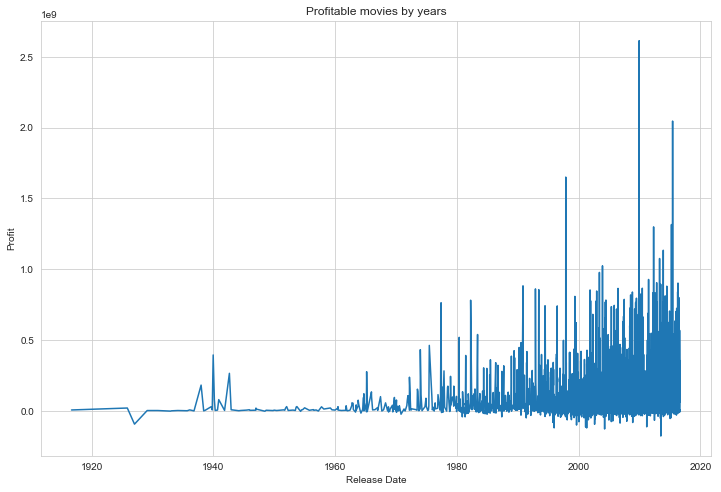

In [19]:
plt.figure(figsize=(12,8))
plt.title('Profitable movies by years')
plt.xlabel('Release Date')
plt.ylabel('Profit')

plt.plot(movies.groupby('release_date').profit.sum())

##### Profitable movies over the years

In [20]:
movies.groupby('release_date').profit.sum().sort_values(ascending=False).head()

release_date
2009-12-10    2613199058
2015-06-09    2046139984
1997-11-18    1650950957
2015-04-01    1316249360
2012-04-25    1299557910
Name: profit, dtype: int64

# More questions 

In [21]:
movies

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,"[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Avatar,7.2,11800,2550965087
1,300000000,"[Adventure, Fantasy, Action]",139.082615,[United States of America],2007-05-19,961000000,169.0,[English],Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[Action, Adventure, Crime]",107.376788,"[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Spectre,6.3,4466,635674609
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,[United States of America],2012-07-16,1084939099,165.0,[English],The Dark Knight Rises,7.6,9106,834939099
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,[United States of America],2012-03-07,284139100,132.0,[English],John Carter,6.1,2124,24139100
5,258000000,"[Fantasy, Action, Adventure]",115.699814,[United States of America],2007-05-01,890871626,139.0,"[English, Français]",Spider-Man 3,5.9,3576,632871626
6,260000000,"[Animation, Family]",48.681969,[United States of America],2010-11-24,591794936,100.0,[English],Tangled,7.4,3330,331794936
7,280000000,"[Action, Adventure, Science Fiction]",134.279229,[United States of America],2015-04-22,1405403694,141.0,[English],Avengers: Age of Ultron,7.3,6767,1125403694
8,250000000,"[Adventure, Fantasy, Family]",98.885637,"[United Kingdom, United States of America]",2009-07-07,933959197,153.0,[English],Harry Potter and the Half-Blood Prince,7.4,5293,683959197
9,250000000,"[Action, Adventure, Fantasy]",155.790452,[United States of America],2016-03-23,873260194,151.0,[English],Batman v Superman: Dawn of Justice,5.7,7004,623260194


##### Top Genres

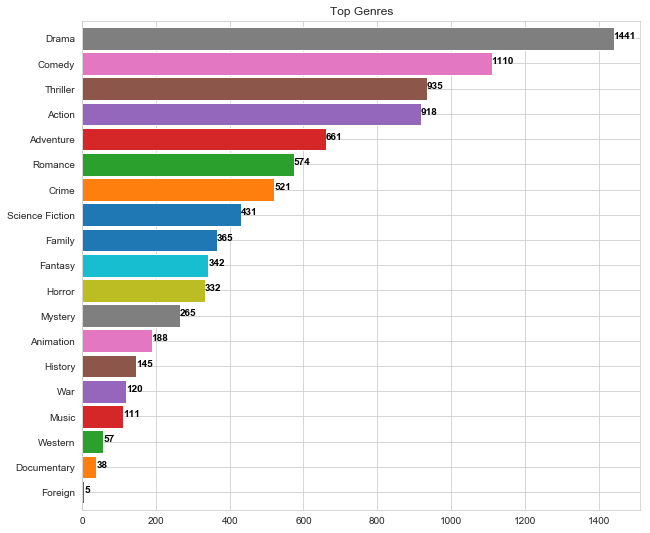

In [22]:
genresList=[]

for i in movies['genres']:
    genresList.extend(i)
    
my = pd.Series(genresList).value_counts().sort_values(ascending=True)

plt.figure(figsize=(10,9))
plt.title('Top Genres')
topGenresPlot = my.plot.barh(width=0.9)

#extra step to label the bars
for i, v in enumerate(my.values): 
    #ax.text(.8, i, v,fontsize=12,color='black',weight='bold')
    topGenresPlot.text(v, i, str(v), color='black', fontweight='bold')

##### Top 10 frequent cast

In [23]:
#clean credits dataset
credits['cast'] = credits['cast'].apply(lambda data: [row['name'] for row in json.loads(data)])

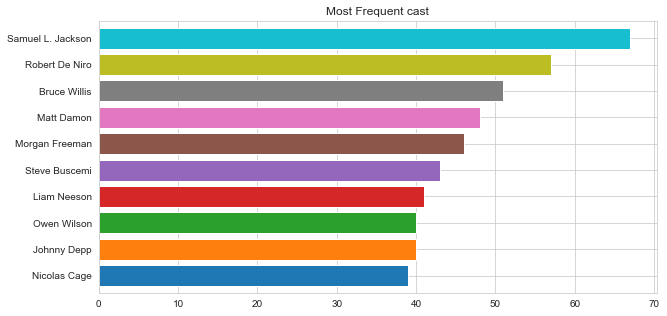

In [24]:
list1 = []
for v in credits['cast']:
    list1.extend(v)

plt.figure(figsize=(10,5))
plt.title('Most Frequent cast')

my = pd.Series(list1).value_counts().sort_values(ascending=False)
mostFrequentCastPlot = my[:10].sort_values(ascending=True).plot.barh(width=0.8)

plt.figure(figsize=(10,5))
plt.title('Most Frequent cast')
#my[:10].sort_values(ascending=True).plot.barh(width=0.8)
#sns.barplot(x=my.values, y=my.index)

sns.countplot(y = pd.Series(list1), order= pd.Series(list1).value_counts()[:10].index)


In [25]:
pd.Series(list1).value_counts().sort_values(ascending=False).head(10)

Samuel L. Jackson    67
Robert De Niro       57
Bruce Willis         51
Matt Damon           48
Morgan Freeman       46
Steve Buscemi        43
Liam Neeson          41
Johnny Depp          40
Owen Wilson          40
Nicolas Cage         39
dtype: int64

##### What is average profit for the most profitable movies?

In [26]:
movies[movies['profit'] > 0].profit.mean()

111542442.55373257

##### What is average budget for profitable movies?

In [27]:
#Not all the movies are profitable
movies[movies['profit'] > 0].budget.mean()

43345408.34864643

##### What is the average duration of the profitable movies?

In [28]:
#Not all the movies are profitable
movies[movies['profit'] > 0]['runtime'].mean()

111.38720262510255

##### What is the average duration of top 5 most profitable movie?

In [29]:
movies.sort_values('profit',ascending=False).head(5).runtime.mean()

152.0

##### What are the languages of the most profitable movies?

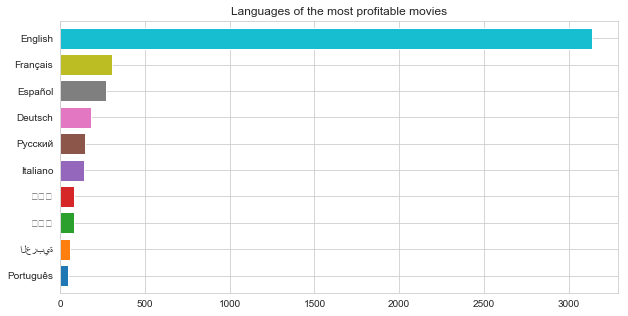

In [30]:
#movies.spoken_languages
list1 = []

for value in movies.spoken_languages:
    list1.extend(value)

plt.figure(figsize=(10,5))
plt.title('Languages of the most profitable movies')

my = pd.Series(list1).value_counts(ascending=False).head(10)
topLanguagesPlot = my.sort_values().plot.barh(width=0.8)

In [31]:
pd.Series(list1).value_counts().head(10)

English      3135
Français      304
Español       273
Deutsch       179
Pусский       148
Italiano      143
日本語            82
普通话            79
العربية        55
Português      46
dtype: int64

### ▣ Analysis

In [32]:
topGenresPlot
topLanguagesPlot
mostFrequentCastPlot

##### For a movie to be successful, it must have the following: 
**Generes:** Drama, Comedy, Thriller, Action, Adventure <br>
**Casts:** Samuel L. Jackson, Robert De Niro, Bruce Willis, Matt Damon, Morgan Freeman <br>
**Average Runtime:** Around 111 Minutes <br>
**Languages:** English, Français, Español, Deutsch, Pусский <br>
**Average Budget:** Around $43,345,408 <br>

- **On average, the movie will have a profit around $111,542,442.**